In [2]:
%matplotlib inline
import pickle
import datetime
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from functools import reduce
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error


import itertools
import statistics

def print_full(x):
    pd.set_option('display.max_rows', 10000)
    pd.set_option('display.max_columns', 10000)

    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
df = pd.read_csv("cleaned_dataset.csv", low_memory=False)
df

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k,eurozone
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5,ABW,Aruba,Aruban Guilder,1955,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6,ABW,Aruba,Aruban Guilder,1956,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
7,ABW,Aruba,Aruban Guilder,1957,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,ABW,Aruba,Aruban Guilder,1958,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9,ABW,Aruba,Aruban Guilder,1959,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [8]:
df['gdpcap'] = df['rgdpna']/df['pop']
df[['gdpcap','country']]


,gdpcap,country
0,NaN,Aruba
1,NaN,Aruba
2,NaN,Aruba
3,NaN,Aruba
4,NaN,Aruba
5,NaN,Aruba
6,NaN,Aruba
7,NaN,Aruba
8,NaN,Aruba
9,NaN,Aruba


In [11]:
df.isnull().sum()


countrycode          0
country              0
currency_unit        0
year                 0
rgdpe             2391
rgdpo             2391
pop               2391
emp               3586
avh               8511
hc                3963
ccon              2391
cda               2391
cgdpe             2391
cgdpo             2391
ck                2421
ctfp              5877
cwtfp             5877
rgdpna            2391
rconna            2391
rdana             2391
rkna              2421
rtfpna            5877
rwtfpna           5877
labsh             4348
delta             2421
xr                2391
pl_con            2391
pl_da             2391
pl_gdpo           2391
i_cig             2391
i_xm              2391
i_xr              2391
i_outlier         2391
cor_exp          11220
statcap          10324
csh_c             2391
csh_i             2391
csh_g             2391
csh_x             2391
csh_m             2391
csh_r             2391
pl_c              2391
pl_i              2391
pl_g       

In [10]:
df.isnull().sum().value_counts()


2391     30
0         5
2421      4
5877      4
8511      1
4348      1
3963      1
10324     1
11220     1
3586      1
dtype: int64

(array([  6.43900000e+03,   1.60700000e+03,   6.54000000e+02,
          4.02000000e+02,   1.18000000e+02,   2.20000000e+01,
          5.10000000e+01,   4.60000000e+01,   1.20000000e+01,
          2.60000000e+01,   1.00000000e+01,   1.00000000e+01,
          8.00000000e+00,   9.00000000e+00,   7.00000000e+00,
          7.00000000e+00,   5.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   3.00000000e+00]),
 array([  1.61594777e+02,   1.20827871e+04,   2.40039795e+04,
          3.59251719e+04,   4.78463643e+04,   5.97675566e+04,
          7.16887490e+04,   8.36099414e+04,   9.55311337e+04,
          1.07452326e+05,   1.19373518e+05,   1.31294711e+05,
          1.43215903e+05,   1.55137096e+05,   1.67058288e+05,
          1.78979480e+05,   1.90900673e+05,   2.02821865e+05,
          2.14743057e+05,   2.26664250e+05,   2.38585442e+05]),
 <a list of 20 Patch objects>)

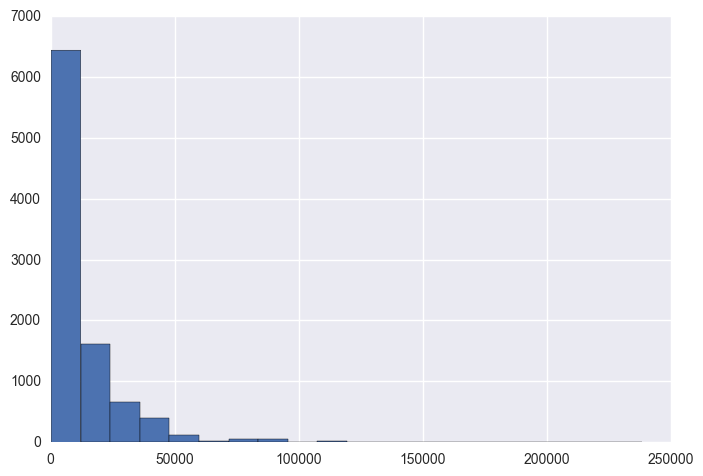

In [14]:
var_name = 'gdpcap'
plot_df = df[df[var_name].notnull()][var_name]
plt.hist(plot_df, bins=20)

(array([   10.,     9.,    68.,   140.,   395.,   674.,   718.,   852.,
          800.,   903.,  1017.,  1038.,   866.,   772.,   553.,   386.,
           64.,    99.,    49.,    26.]),
 array([ 2.20842732,  2.36688815,  2.52534898,  2.68380981,  2.84227064,
         3.00073147,  3.15919231,  3.31765314,  3.47611397,  3.6345748 ,
         3.79303563,  3.95149646,  4.10995729,  4.26841812,  4.42687895,
         4.58533979,  4.74380062,  4.90226145,  5.06072228,  5.21918311,
         5.37764394]),
 <a list of 20 Patch objects>)

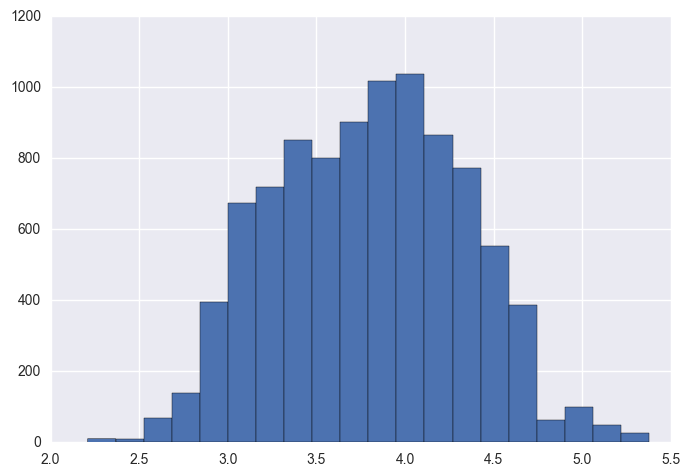

In [15]:
plt.hist(plot_df.apply(lambda x: math.log10(x)), bins=20)

(array([  8.77600000e+03,   3.36000000e+02,   1.48000000e+02,
          6.20000000e+01,   3.10000000e+01,   2.30000000e+01,
          9.00000000e+00,   1.00000000e+01,   4.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   7.00000000e+00,
          4.00000000e+00,   2.00000000e+00]),
 array([  8.10732555e+00,   8.57534602e+05,   1.71506110e+06,
          2.57258759e+06,   3.43011409e+06,   4.28764058e+06,
          5.14516708e+06,   6.00269357e+06,   6.86022006e+06,
          7.71774656e+06,   8.57527305e+06,   9.43279955e+06,
          1.02903260e+07,   1.11478525e+07,   1.20053790e+07,
          1.28629055e+07,   1.37204320e+07,   1.45779585e+07,
          1.54354850e+07,   1.62930115e+07,   1.71505380e+07]),
 <a list of 20 Patch objects>)

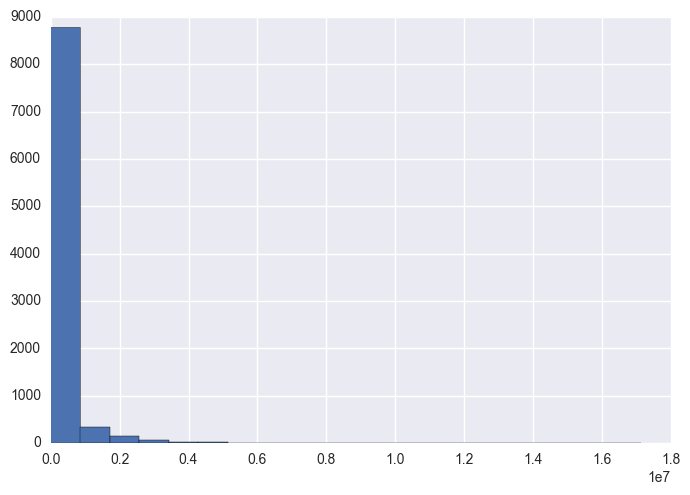

In [22]:
plt.hist(plot_df, bins=20)

(array([    8.,     7.,    23.,    69.,   162.,   273.,   395.,   476.,
          805.,   910.,  1315.,  1106.,   966.,   921.,   865.,   530.,
          330.,   180.,    61.,    37.]),
 array([ 0.90887761,  1.22514762,  1.54141763,  1.85768763,  2.17395764,
         2.49022765,  2.80649765,  3.12276766,  3.43903767,  3.75530767,
         4.07157768,  4.38784769,  4.70411769,  5.0203877 ,  5.33665771,
         5.65292771,  5.96919772,  6.28546773,  6.60173773,  6.91800774,
         7.23427775]),
 <a list of 20 Patch objects>)

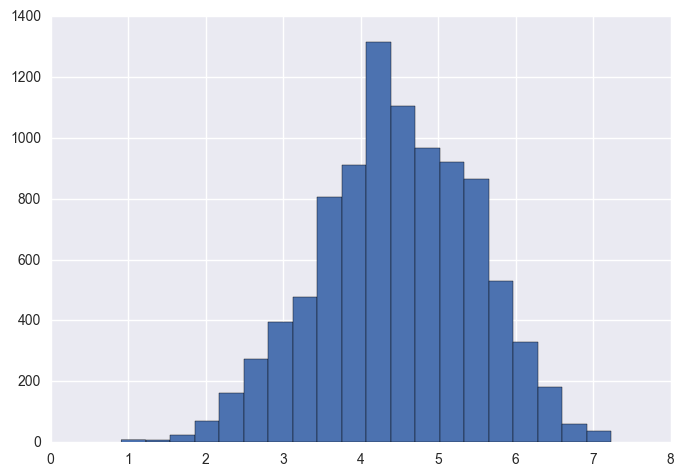

In [21]:
plt.hist(plot_df.apply(lambda x: math.log10(x)), bins=20)